In [19]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
stations = pd.read_csv('./stations_with_cluster_4_without_pca.csv')

In [4]:
stations.head()

,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,...,node_density_km,intersection_density_km,edge_density_km,street_density_km,circuity_avg,self_loop_proportion,clean_intersection_count,clean_intersection_density_km,station_name_roman,cluster_number
0,1130506,1130506,東所沢,NaN,NaN,11305,11,359-0022,所沢市本郷１丁目,139.513878,...,210.635144,200.261250,44092.478846,22317.256266,1.033771,0.002147,366.0,165.080220,NaN,0
1,1130507,1130507,新座,NaN,NaN,11305,11,352-0011,新座市野火止５丁目,139.556328,...,212.306961,176.365231,36061.846385,18873.557190,1.096247,0.003834,277.0,115.765803,NaN,2
2,1130508,1130508,北朝霞,NaN,NaN,11305,11,351-0033,朝霞市浜崎１丁目,139.587322,...,247.449356,220.936925,43252.257861,22209.618128,1.058486,0.001174,335.0,134.570673,NaN,0
3,1130509,1130509,西浦和,NaN,NaN,11305,11,338-0837,さいたま市桜区田島５丁目,139.627707,...,278.826632,220.477262,41545.071412,21726.569992,1.042005,0.000000,301.0,125.451145,NaN,0
4,1130510,1130510,武蔵浦和,NaN,NaN,11305,11,336-0021,さいたま市南区別所七丁目12-1,139.647974,...,272.668926,246.320245,45257.298857,23983.223340,1.010927,0.000000,418.0,166.874979,NaN,0


In [9]:
X_columns = ['n', 'm', 'k_avg', 'intersection_count',
       'streets_per_node_avg', 'edge_length_total', 'edge_length_avg',
       'street_length_total', 'street_length_avg', 'street_segments_count',
       'node_density_km', 'intersection_density_km', 'edge_density_km',
       'street_density_km', 'circuity_avg', 'self_loop_proportion',
       'clean_intersection_count', 'clean_intersection_density_km']

y_columns = ['cluster_number']

In [24]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# データ分割
X = stations[X_columns]
y = stations[y_columns]
X_train = X
y_train = y
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 決定木クラスの初期化と学習
model = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
model.fit(X_train, y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))


正解率(train):0.934


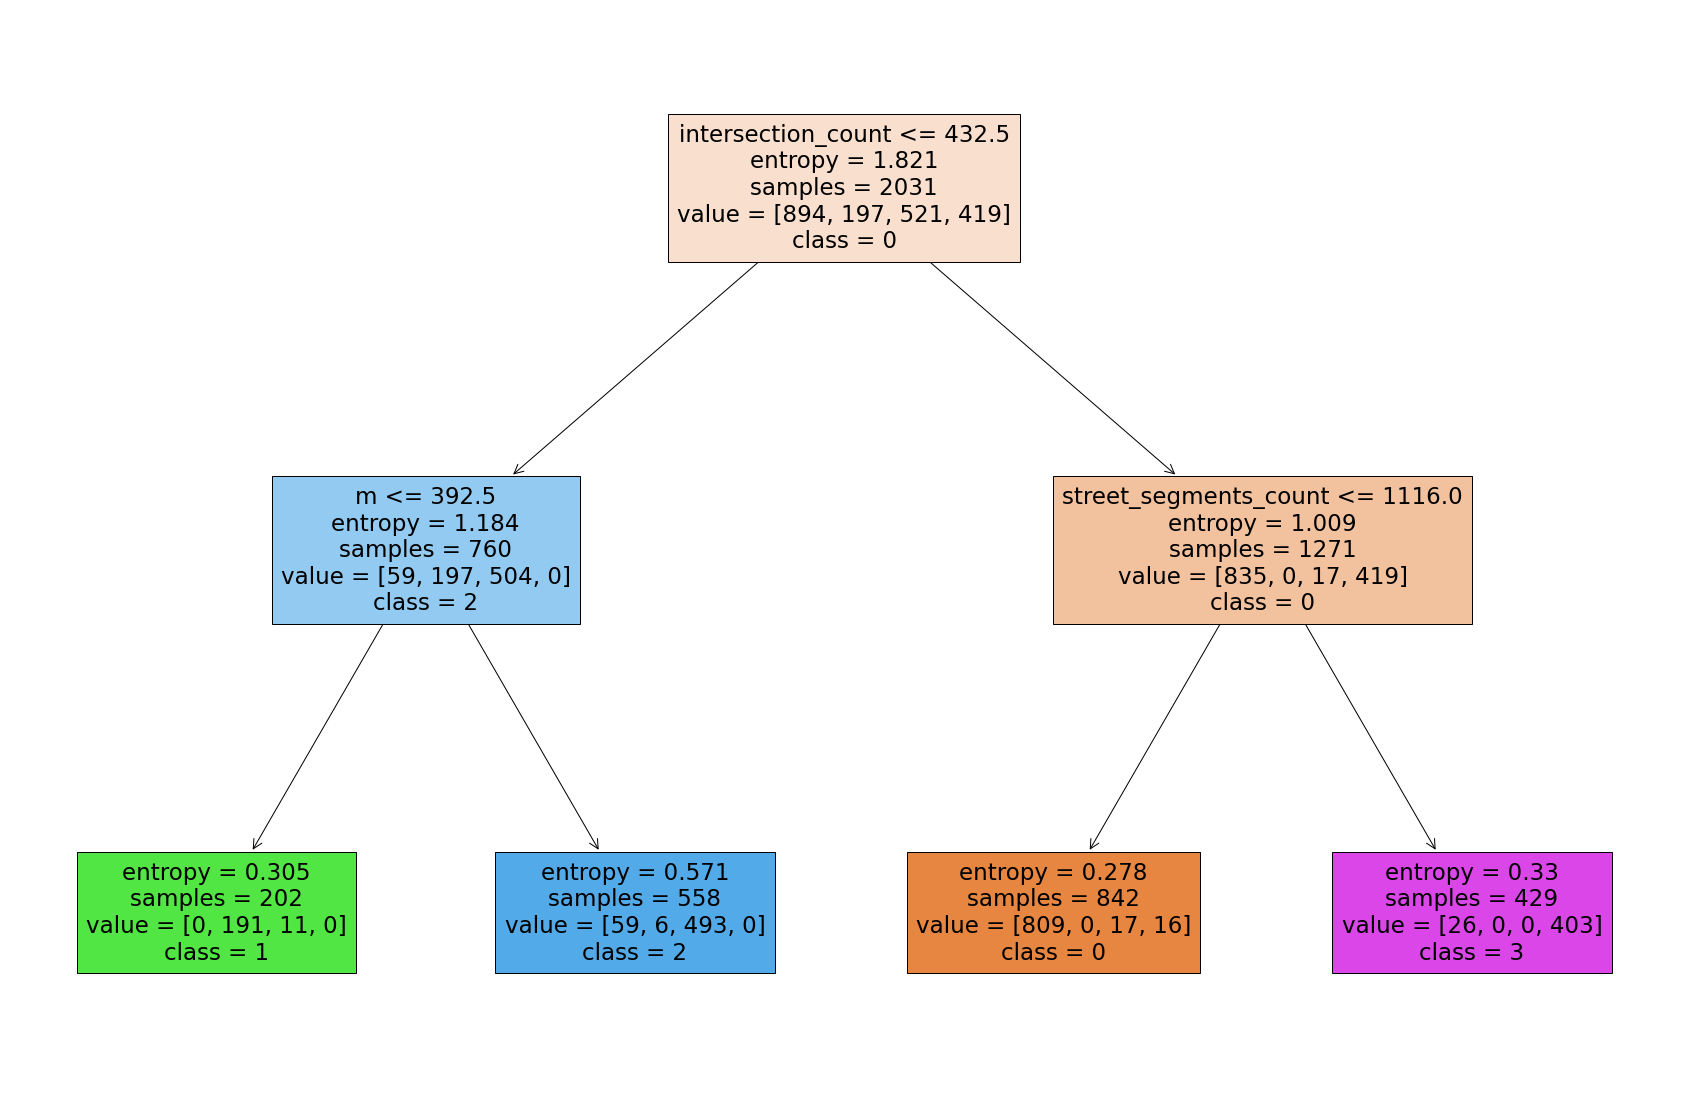

In [25]:
# 参考プログラム
from sklearn import tree
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot()
plot_tree(model, feature_names=X_columns, ax=ax, class_names=['0', '1', '2', '3'], filled=True);


In [15]:
def hist_feature(feature_name):
    target_names = stations['cluster_number'].unique()
    plt.figure()

    # 最大値と最小値の間をn_bin等分した幅でヒストグラムの棒を表示するように設定（各targetのbin幅を統一する）
    n_bin = 15
    x_max = stations[feature_name].max()
    x_min = stations[feature_name].min()
    bins = np.linspace(x_min, x_max, n_bin)

    for target in target_names:
        plt.hist(stations[stations['cluster_number'] == target][feature_name], bins=bins, alpha=0.6, label=labels[target])

    plt.title(feature_name)
    plt.legend()
    plt.savefig(f"{feature_name}_hist.png", bbox_inches = "tight")

In [21]:
labels = {0: 'second dense area', 1: 'forth dense area', 2: 'third dense area', 3: 'first dense area'}

In [22]:
feature_columns = ['n', 'm', 'k_avg', 'intersection_count',
       'streets_per_node_avg', 'edge_length_total', 'edge_length_avg',
       'street_length_total', 'street_length_avg', 'street_segments_count',
       'node_density_km', 'intersection_density_km', 'edge_density_km',
       'street_density_km', 'circuity_avg', 'self_loop_proportion',
       'clean_intersection_count', 'clean_intersection_density_km']


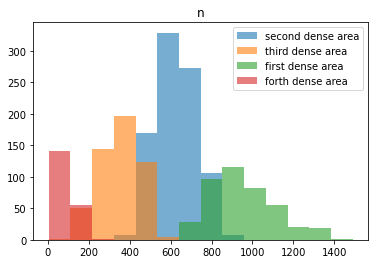

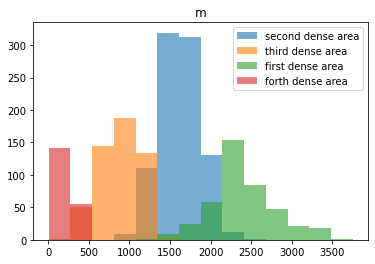

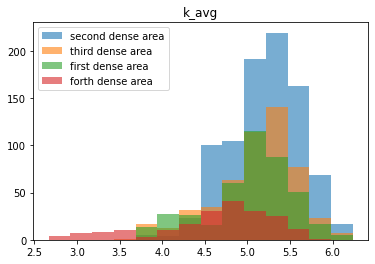

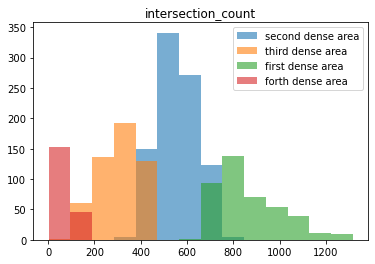

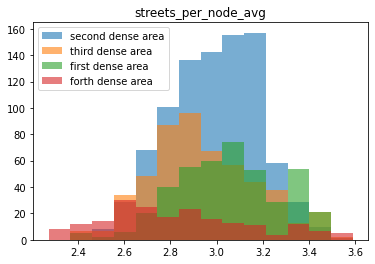

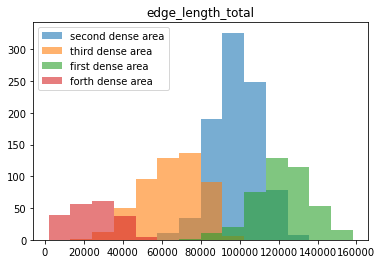

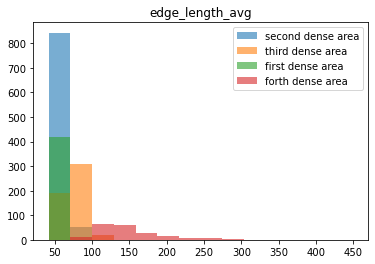

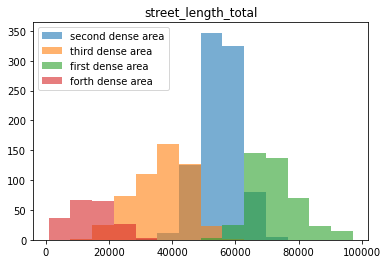

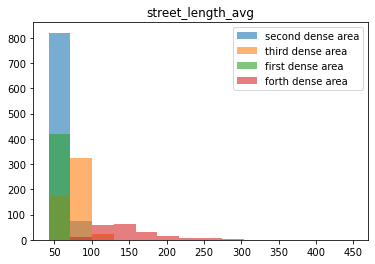

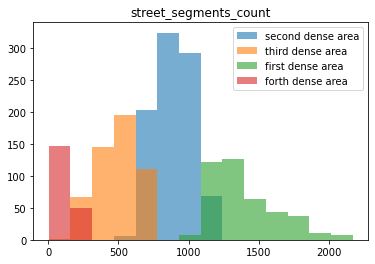

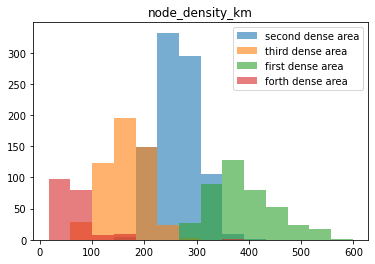

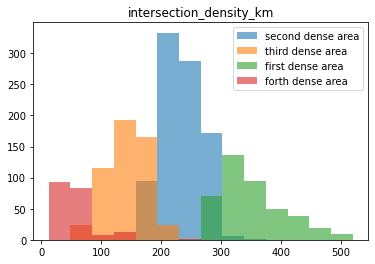

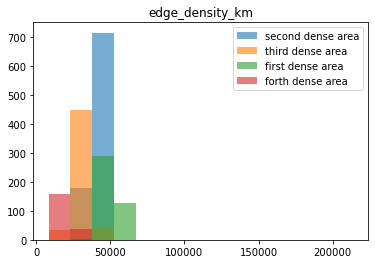

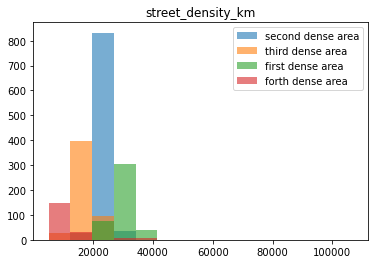

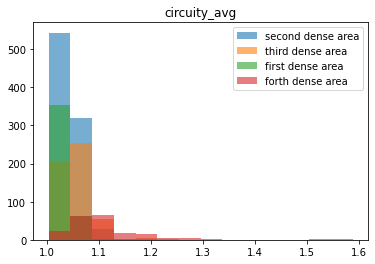

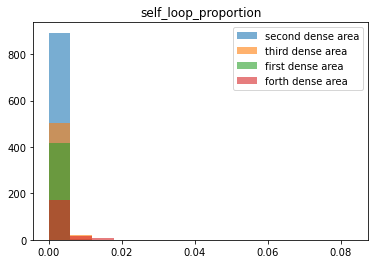

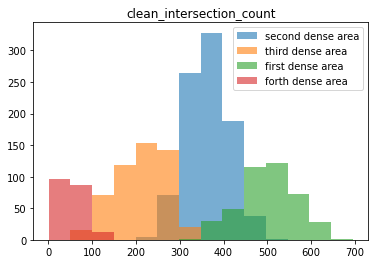

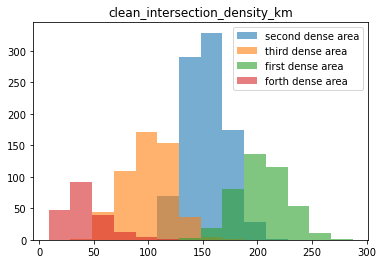

In [23]:
for feature in feature_columns:
    hist_feature(feature)